In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df=pd.read_csv('D:/Semester 8/NLP/IA/sentimentanalyis_1-main/Labelling reviews/labelled_reviews2.csv')

train, test = train_test_split(df, test_size=0.2, random_state=25)

In [3]:
train.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,reviews,new_reviews,Positive,Negative,Neutral,Compound,Sentiment
1389,1438,1438,1438,\ncompared to the picture the product looks ve...,compare picture product look goodi like qualit...,0.217,0.0,0.783,0.3612,0
2865,2953,2953,2953,\nProduct quality is good in every feature\n,product quality good every feature,0.420,0.0,0.580,0.4404,0
1299,1343,1343,1343,\nBought for my niece for her UKG. It's spacio...,buy niece ukg spacious light weight appropriat...,0.248,0.0,0.752,0.7650,0
2318,2394,2394,2394,\nProduct looks good and stylish. Got a 48L on...,product look good stylish get 48l one short tr...,0.151,0.0,0.849,0.7689,0
684,709,709,709,"\nColour, the material used and inner compartm...",colour material use inner compartment good,0.367,0.0,0.633,0.4404,0


In [4]:
test.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,reviews,new_reviews,Positive,Negative,Neutral,Compound,Sentiment
2174,2249,2249,2249,\nMy daughter love this bag thanks 💕\n,daughter love bag thank,0.770,0.00,0.230,0.7717,0
3035,3128,3128,3128,\nI bought this for my 5year old boy. It has v...,buy 5year old boy good quality space store boo...,0.318,0.00,0.682,0.8934,0
1020,1056,1056,1056,\nThe American Tourister 32L backpack is a rel...,american tourister 32l backpack reliable pract...,0.205,0.01,0.785,0.9686,0
2730,2817,2817,2817,\nVery good and original items.. superb\n,good original item superb,0.903,0.00,0.097,0.8519,0
2027,2094,2094,2094,\nColor varied from the color shown in the pic...,color varied color show picture get thick colo...,0.146,0.00,0.854,0.4404,0


In [5]:
# positive reviews
sum(train["Sentiment"] == 0)

2244

In [6]:
# negative reviews
sum(train["Sentiment"] == 1)


184

In [7]:
# check if there are any missing values
train.isnull().sum()

Unnamed: 0.2    0
Unnamed: 0.1    0
Unnamed: 0      0
reviews         0
new_reviews     0
Positive        0
Negative        0
Neutral         0
Compound        0
Sentiment       0
dtype: int64

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 


import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# extract the labels from the train data
y = train.Sentiment.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(train.new_reviews.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

clf = DecisionTreeClassifier()
clf = clf.fit(x_train_vec,y_train)
y_pred = clf.predict(x_test_vec)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 95.88477366255144


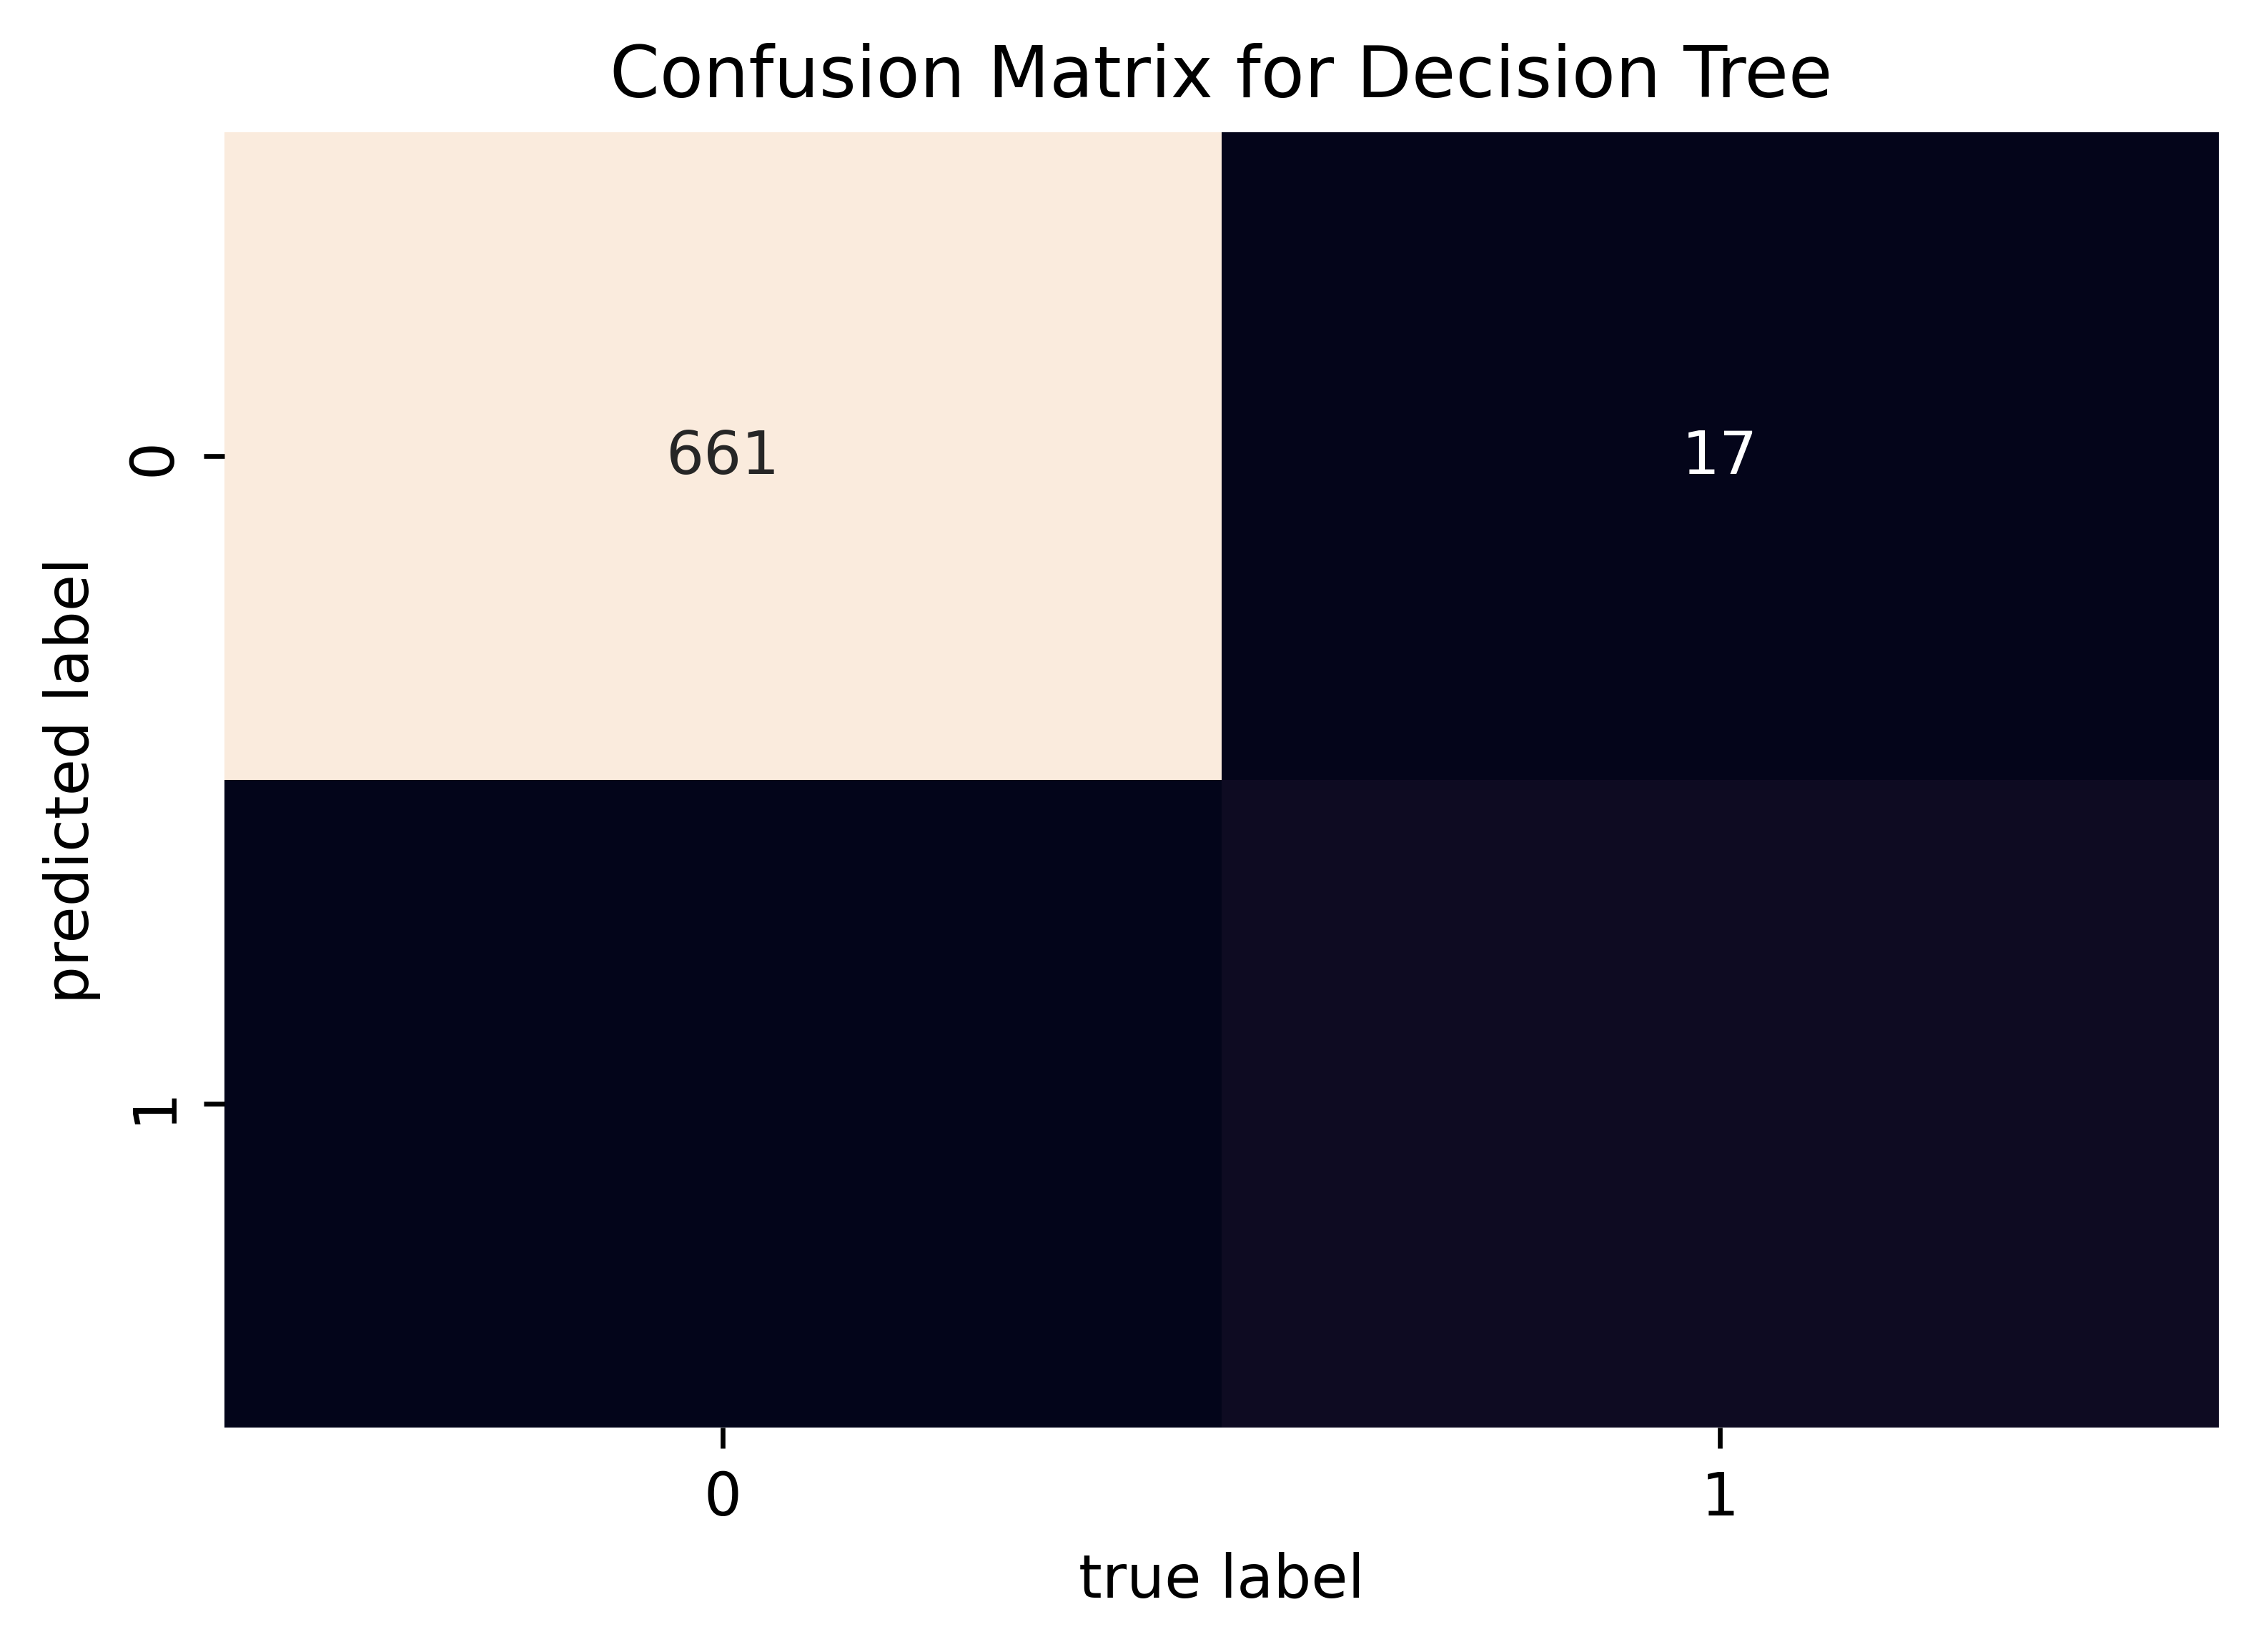

In [12]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [13]:
import statsmodels.api as sm

ols = sm.OLS(y_test,y_pred)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.515
Model:                            OLS   Adj. R-squared (uncentered):              0.514
Method:                 Least Squares   F-statistic:                              772.4
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                   1.95e-116
Time:                        16:18:13   Log-Likelihood:                          171.19
No. Observations:                 729   AIC:                                     -340.4
Df Residuals:                     728   BIC:                                     -335.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7451      0.027     27.792      0.000       0.692       0.798
==============================================================================
Omnibus:                      420.094   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10602.249
Skew:                           2.084   Prob(JB):                         0.00
Kurtosis:                      21.212   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
import pickle
file="tree_model.pkl"
fileobj=open(file,'wb')
pickle.dump(clf,fileobj)
fileobj.close()

In [15]:
file="tree_model.pkl"
fileobj=open(file,'rb')
mp=pickle.load(fileobj)
print(mp)

DecisionTreeClassifier()


In [17]:


tex=[]
s=input("enter tweet")
tex.append(s)
#initializing the countvectorizer 
vectorizer=CountVectorizer()

#tokenize and make the document into a matrix 
document_term_matrix=vectorizer.fit_transform(tex)
# Get feature names
try:
    # For scikit-learn version 0.24.0 or later
    feature_names = vectorizer.get_feature_names_out()
except AttributeError:
    # For older versions
    feature_names = vectorizer.get_feature_names()

# Check the result
pd.DataFrame(document_term_matrix.toarray(), columns=feature_names)
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
hi = vectorizer.transform(tex)
x_test_vec = vectorizer.transform(x_test)
y_pred = mp.predict(hi)
print(y_pred)

[0]
